**Предобработка датасета**

Выполненные пункты:

1.   Импортируем датасет и смотрим информацию о структуре и содержимом данных
2.   Узнаем названия городов и областей, где находиться недвижимость, по координатам
3.   Открываем обновленный датасет с названиями городов и регионов, где находить недвижимость
4.   Удаляем дубликаты
5.   Находим список стран, где находиться проданная недвижимость
6.   Находим список 'city_id' иностранных городов
7.   Проверяем список 'city_id' иностранных городов на ошибки
8.   Удаляем иностранные города
9.   Определяем название городам и регионам у которых значение NaN
10.  Обновляем столбцы 'city', 'region', чтобы не было NaN
11.  Определяем список 'city_id', где есть метро
12.  Создаем новый столбец 'isMetro' - находиться в городе метро (1) или нет (0)
13.  Меняем всем городом, где нет метро, значение metro_station_id на 0, а для городов, где есть метро меняем -1 и NaN на 0
14.  Удаляем столбцы
15.  Заменяем значение "-1" у столбца 'district_id' на NaN
16.  Заменяем "0" у столбцов 'rooms_cnt','wall_id', 'series_id','floors_cnt' на NaN
17.  Удаляем строки, где малое количество пропущенных значений, в столбцах 'area_total', 'two_levels', 'balcon', 'bathroom', 'windows', 'keep', 'floors_cnt', 'floor_num', 'sold_price', 'region', 'district_id', 'wall_id', 'series_id'
18.  Делаем Label Encoding для столбца 'region'
19.  Меняем название столбца 'region' на 'region_id'
20.  Добавляем новые столбцы 'id_rigion_city','id_city_district', 'id_city_street' с информацией о привязке недвижимости к региону, городу, району и улицы
21.  Меняем  пропущенные значения (Null или 0) на 1 в столбце 'bathrooms_cnt' по условию задачи
22.  Делаем Label Encoding в столбцах 'id_rigion_city','id_city_district', 'id_city_street', 'keep', 'balcon', 'two_levels', 'type', 'bathroom', 'windows'
23.  Заменяем список типов в столбце 'territory', который содержит информацию о территории, на их количество в ячейке, игнорируя пропущенные значения (NaN)
24.  Находим список некорректных значений в столбце 'building_year'
25.  Исправляем некорректные значения в столбце 'building_year'
26.  Анализируем выбросы
27.  Приводим значение в столбце 'sold_price' к одной единице измерения
28.  Удаляем выбросы в столбце 'sold_price', где значение меньше 1000 или больше 10 000 000
29.  Удаляем выбросы в столбце 'area_total', где значение меньше 10 и больше 130
30.  Удаляем выбросы в столбцах 'floor_num', 'floors_cnt', 'rooms_cnt', 'bedrooms_cnt', 'building_year', 'bathrooms_cnt' , 'territory'
31.  Добавляем столбец  'price_per_sqm' - цена за квадратный метр
32. Заменяем  NaN на медианное значение в столбцах  'bedrooms_cnt', 'building_year', 'territory', 'rooms_cnt' отсортированным  по столбцу 'series_id'
33.  Строим матрицу корреляции
34.  Сохраняем пред обработанный датасет в Excel


**После предобработки получился датасета длиной 58430 строк и 27 столбцами:**
- city_id         - идентификатор города
- district_id     - идентификатор района
- street_id       - идентификатор улицы
- sold_price      - цена за которую объект был продан
- metro_station_id- идентификатор ближайшей станции метро
- floor_num       - этаж
- floors_cnt      - количество этажей в доме
- rooms_cnt       - количество комнат
- bedrooms_cnt    - количество спален
- building_year   - год постройки дома
- area_total      - общая площадь
- type            - тип объекта (квартира, комната, общежитие, пансионат, малосемейка)
- two_levels      - двухуровневая
- bathroom        - тип сан. узла
- bathrooms_cnt   - количество сан. узлов (если NULL - значит 1)
- windows         - тип окон
- territory       - описание придомовой территории, мнемоники объектов перечисленные через запятую
- keep            - тип отделки квартиры
- series_id       - серия дома
- wall_id         - тип стен дома
- balcon          - тип балкона/балконов
- region_id       - идентификатор региона 
- isMetro         - наличие метро 
- id_rigion_city  - идентификатор регион/город
- id_city_district- идентификатор город/район
- id_city_street  - идентификатор город/улица
- price_per_sqm   - цена за квадратный метр

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.geocoders import options

pd.set_option('display.max_columns', None)
 

# Предобработка датасета

## 1) Импортируем датасет и смотрим информацию о структуре и содержимом данных

In [ ]:
data_sold_flats = pd.read_csv('/content/drive/MyDrive/E-soft/ТЗ/ver_final/sold_flats_2020-09-30.csv', sep=",")
display(data_sold_flats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71761 entries, 0 to 71760
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71761 non-null  int64  
 1   status            71761 non-null  object 
 2   city_id           71761 non-null  int64  
 3   district_id       71761 non-null  int64  
 4   street_id         71761 non-null  int64  
 5   price             71751 non-null  float64
 6   date_sold         71761 non-null  object 
 7   sold_price        71621 non-null  float64
 8   metro_station_id  71756 non-null  float64
 9   flat_on_floor     71761 non-null  int64  
 10  floor_num         71755 non-null  float64
 11  floors_cnt        71755 non-null  float64
 12  rooms_cnt         71479 non-null  float64
 13  bedrooms_cnt      71015 non-null  float64
 14  building_year     70168 non-null  float64
 15  area_total        71758 non-null  float64
 16  area_live         71758 non-null  float6

<ipython-input-3-bbf41517e740>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data_sold_flats = pd.read_csv('/content/drive/MyDrive/E-soft/ТЗ/ver_final/sold_flats_2020-09-30.csv', sep=",")


None

## 2) Узнаем названия городов, областей, стран, где находиться недвижимость, по координатам.
**Добавим три соответствующих  столбца 'city', 'region','country'**

In [ ]:
options.default_user_agent = "my-custom-user-agent"

# Определяем функцию для поиска местоположения по координатам
def find_location(geolocator, lat, lon):
    try:
        location = geolocator.reverse(f"{lat}, {lon}")
        address = location.raw['address']
        city = address.get('city', np.nan)
        region = address.get('state', np.nan)
        country = address.get('country', np.nan)
    except Exception:
        city = np.nan
        region = np.nan
        country = np.nan

    display(city, region, country)
    return city, region,country



# Создаем экземпляр геокодера с собственным user_agent
geolocator = Nominatim(user_agent='my-custom-user-agent')


# Применяем функцию find_location к столбцам latitude и longitude с помощью метода apply
# Если координаты не пропущены и удалось получить адрес по координатам, записываем город, регион, страну в отдельные столбцы
# Если возникла ошибка, записываем координаты в файл и возвращаем None
data_sold_flats[['city', 'region','country']] = data_sold_flats.apply(lambda row: pd.Series(find_location(geolocator, row['latitude'], row['longitude'])), axis=1)

data_sold_flats.to_excel('/content/drive/MyDrive/E-soft/ТЗ/ver_final/data_sold_flats_location.xlsx', index=False)

## 3) Открываем обновленный датасет с названиями городов и регионов, где находить недвижимость

In [ ]:
data_sold_flats_location = pd.read_excel('/content/drive/MyDrive/E-soft/ТЗ/ver_final/data_sold_flats_location.xlsx')
display(data_sold_flats_location.head(1000))

,id,status,city_id,district_id,street_id,price,date_sold,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,bedrooms_cnt,building_year,area_total,area_live,area_kitchen,area_balcony,builder_id,type,two_levels,levels_count,bathroom,bathrooms_cnt,plate,windows,territory,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,longitude,latitude,city,region,country
0,86668,sold,23,12440,353,4980.0,2014-05-16,4880.0,0.0,0,5.0,9.0,3.0,0.0,1989.0,62.0,0.0,8.0,0,0,flat,no,1,unite,NaN,electric,plastic,"parking,closed,elevator",cosmetic,NaN,46.0,11.0,yes_balcon,0,0.00,NaN,65.552498,57.143242,Тюмень,Тюменская область,Россия
1,87951,sold,23,5279,263,2550.0,2014-02-17,2550.0,0.0,0,5.0,10.0,1.0,0.0,2008.0,40.0,0.0,8.0,0,0,flat,no,1,separate,NaN,electric,wood,"parking,guest_parking,yard_opened,elevator",well_black,1000,50.0,12.0,yes_balcon,0,0.00,NaN,65.567250,57.110282,Тюмень,Тюменская область,Россия
2,90703,sold,23,588,339,2200.0,2014-07-04,2200.0,0.0,0,5.0,5.0,2.0,0.0,1969.0,44.0,0.0,6.0,0,0,flat,no,1,separate,NaN,NaN,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,45.0,12.0,yes_balcon,0,0.00,NaN,65.593887,57.147141,Тюмень,Тюменская область,Россия
3,92948,sold,23,139,546,650.0,2014-09-03,650.0,0.0,0,1.0,4.0,2.0,0.0,1960.0,42.0,26.7,6.0,0,0,flat,no,1,separate,NaN,no_plate,plastic,"parking,guest_parking,yard_opened,without_elev...",need,NaN,79.0,11.0,no_balcon,0,2.50,NaN,65.518670,57.144386,Тюмень,Тюменская область,Россия
4,102940,sold,23,5279,263,3300.0,2017-11-09,3300.0,0.0,0,1.0,10.0,3.0,3.0,2007.0,65.0,38.0,12.0,4,0,flat,no,1,separate,2.0,electric,plastic,"kolyasochnaya,parking,yard_opened,elevator",good,NaN,50.0,12.0,loggia,0,2.53,NaN,65.568459,57.113392,Тюмень,Тюменская область,Россия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,277834,sold,23,121,288,2950.0,2014-05-05,2850.0,0.0,0,5.0,5.0,3.0,0.0,1977.0,50.0,0.0,0.0,0,0,flat,no,1,separate,NaN,NaN,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,49.0,11.0,yes_balcon,0,0.00,NaN,65.635377,57.176508,Тюмень,Тюменская область,Россия
996,277846,sold,146,1829,5582,1750.0,2014-05-30,1730.0,0.0,0,4.0,9.0,1.0,0.0,2009.0,44.0,18.0,15.0,0,0,flat,no,1,unite,NaN,gas,plastic,"child_place,parking,elevator",cosmetic,1800,1233.0,11.0,loggia,0,2.00,NaN,44.798728,48.752838,Волжский,Волгоградская область,Россия
997,277868,sold,23,464,283,3350.0,2014-03-28,3300.0,0.0,0,7.0,7.0,3.0,0.0,1995.0,66.0,0.0,0.0,0,0,flat,no,1,separate,NaN,electric,plastic,"parking,yard_opened,elevator",cosmetic,NaN,133.0,12.0,balcon,0,0.00,NaN,65.641694,57.152599,Тюмень,Тюменская область,Россия
998,277893,sold,66,837,2106,4250.0,2014-03-07,4250.0,0.0,0,10.0,15.0,2.0,0.0,2012.0,66.0,0.0,0.0,0,0,flat,no,1,unite,NaN,NaN,plastic,"child_place,kolyasochnaya,parking,subway_parki...",cosmetic,NaN,44.0,14.0,loggia,0,3.00,NaN,76.593065,60.933422,городской округ Нижневартовск,Ханты-Мансийский автономный округ — Югра,Россия


In [ ]:
data_sold_flats_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71761 entries, 0 to 71760
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71761 non-null  int64  
 1   status            71761 non-null  object 
 2   city_id           71761 non-null  int64  
 3   district_id       71761 non-null  int64  
 4   street_id         71761 non-null  int64  
 5   price             71751 non-null  float64
 6   date_sold         71761 non-null  object 
 7   sold_price        71621 non-null  float64
 8   metro_station_id  71756 non-null  float64
 9   flat_on_floor     71761 non-null  int64  
 10  floor_num         71755 non-null  float64
 11  floors_cnt        71755 non-null  float64
 12  rooms_cnt         71479 non-null  float64
 13  bedrooms_cnt      71015 non-null  float64
 14  building_year     70168 non-null  float64
 15  area_total        71758 non-null  float64
 16  area_live         71758 non-null  float6

## 4) Удаляем дубликаты

In [ ]:
# Список дубликатов строк
duplicates_id = [1429211, 1429219, 1916319]

data_sold_flats_location = data_sold_flats_location[~data_sold_flats_location['id'].isin(duplicates_id)]

## 5) Находим список стран, где находиться проданная недвижимость
**Список стран, где были продана недвижимость: ['Россия', nan, 'ایران', 'Қазақстан', 'Беларусь', 'Latvija', 'Україна']**

In [ ]:
unique_country = data_sold_flats_location['country'].unique().tolist()
display(f"Список стран, где были продана недвижимость: {unique_country}")

"Список стран, где были продана недвижимость: ['Россия', nan, 'ایران', 'Қазақстан', 'Беларусь', 'Latvija', 'Україна']"

## 6) Находим список 'city_id' иностранных городов
**Список 'city_id' иностранных городов: [1066, 577, 373, 236, 201, 184, 180, 155]**

In [ ]:
# Список иностранных стран
countries = ['Қазақстан', 'Беларусь', 'Latvija', 'Україна', 'ایران']

# Выбираем только строки, где иностранная страна
mask = data_sold_flats_location['country'].isin(countries)

unique_city_id_foreign_country = data_sold_flats_location[mask].sort_values(by='city_id', ascending=False)['city_id'].unique().tolist()

display(f"Список 'city_id' иностранных городов: {unique_city_id_foreign_country}")

"Список 'city_id' иностранных городов: [1066, 577, 373, 236, 201, 184, 180, 155]"

## 7) Проверяем список 'city_id' иностранных городов на ошибки
**После проверки остался следующий список 'city_id' иностранных городов: [1066,  577,  373,  236,  201]**

In [ ]:
data_sold_flats_foreign_country = data_sold_flats_location.copy()

# Меняем NaN на 'NaN' для nunique()
data_sold_flats_foreign_country[['city_id', 'city', 'region', 'country']] = data_sold_flats_foreign_country[['city_id', 'city', 'region', 'country']].fillna(value="NaN")

# Фильтруем DataFrame по списку уникальных идентификаторов городов
filtered_df = data_sold_flats_foreign_country[data_sold_flats_foreign_country['city_id'].isin(unique_city_id_foreign_country)]

# Группируем DataFrame по столбцам 'city_id', 'city', 'region', 'country' и считаем количество уникальных значений в каждой группе
result = filtered_df.groupby(['city_id', 'city', 'region', 'country']).nunique()


result = result.reset_index()[['city_id', 'city', 'region', 'country']]
display(result)

,city_id,city,region,country
0,155,NaN,NaN,NaN
1,155,NaN,Москва,NaN
2,155,NaN,Москва,Россия
3,155,Москва,Москва,NaN
4,155,Москва,Москва,Россия
5,155,دهستان شلمی,استان گلستان,ایران
6,180,NaN,NaN,NaN
7,180,NaN,Ақтөбе облысы,NaN
8,180,NaN,Ақтөбе облысы,Қазақстан
9,180,NaN,Татарстан,NaN


## 8) Удаляем иностранные города

In [ ]:
# Измененный писок 'city_id' иностранных городов
unique_city_id_foreign_country_update = [1066,  577,  373,  236,  201]

data_sold_flats_foreign_country = data_sold_flats_foreign_country[~data_sold_flats_foreign_country['city_id'].isin(unique_city_id_foreign_country_update)]

## 9) Определяем название городам и регионам у которых значение NaN

In [ ]:
pd.set_option('display.max_rows', None)

# Меняем NaN на 'NaN' для nunique()
data_sold_flats_city_region = data_sold_flats_foreign_country.copy()
data_sold_flats_city_region["city"].fillna(value="NaN", inplace=True)
data_sold_flats_city_region["region"].fillna(value="NaN", inplace=True)

# Группируем и считаем количество уникальных записей по каждому city_id
grouped = data_sold_flats_city_region.groupby(['city_id', 'city', 'region']).nunique()
unique_rows = grouped[grouped.columns[:1]]
unique_rows.columns = ['count']

# Сортируем по убыванию количества уникальных записей
unique_rows = unique_rows.sort_values(by=['city_id', 'count'], ascending=[True, False])

# Определяем наиболее частый регион и город для каждого city_id
most_common_region = {}
most_common_city = {}

for city_id, group in unique_rows.reset_index().groupby('city_id'):
    region_values = group['region'].values
    city_values = group['city'].values
    
    for value in region_values:
        if value != 'NaN':
            most_common_region[city_id] = value
            break
    
    if city_id not in most_common_region:
        most_common_region[city_id] = 'NaN'
        
    for value in city_values:
        if value != 'NaN':
            most_common_city[city_id] = value
            break
            
    if city_id not in most_common_city:
        most_common_city[city_id] = 'NaN'
            

# Добавляем новые столбцы с самым частым регионом и городом для каждого city_id
unique_rows['most_common_city'] = unique_rows.index.get_level_values('city_id').map(most_common_city)
unique_rows['most_common_region'] = unique_rows.index.get_level_values('city_id').map(most_common_region)


display(unique_rows)

pd.reset_option('display.max_rows')

count  \
city_id city                             region                                            
23      Тюмень                           Тюменская область                         19299   
        NaN                              NaN                                         548   
                                         Тюменская область                           531   
                                         Свердловская область                          6   
                                         Республика Коми                               4   
        Новый Уренгой                    Ямало-Ненецкий автономный округ               1   
        городской округ Омск             Омская область                                1   
24      NaN                              Тюменская область                            55   
                                         NaN                                          27   
26      NaN                              Тюменская область                           462   
                                         NaN                                          53   
                                         Республика Коми                               1   
27      NaN                              Тюменская область                           853   
                                         NaN                                         181   
28      Тобольск                         Тюменская область                          2370   
        NaN                              NaN                                         154   
                                         Тюменская область                            50   
30      NaN                              NaN                                          51   
                                         Свердловская область                          1   
45      Екатеринбург                     Свердловская область                       2248   
        NaN                              NaN                                         768   
                                         Свердловская область                        170   
                                         Пермский край                                 7   
        Первоуральск                     Свердловская область                          3   
        Сургут                           Ханты-Мансийский автономный округ — Югра      2   
        городской округ Сургут           Ханты-Мансийский автономный округ — Югра      1   
47      Ханты-Мансийск                   Ханты-Мансийский автономный округ — Югра    412   
        NaN                              Ненецкий автономный округ                   167   
                                         NaN                                         166   
                                         Ханты-Мансийский автономный округ — Югра      2   
64      NaN                              NaN                                           1   
66      городской округ Нижневартовск    Ханты-Мансийский автономный округ — Югра    628   
        Нижневартовск                    Ханты-Мансийский автономный округ — Югра    187   
        NaN                              Ханты-Мансийский автономный округ — Югра     52   
                                         NaN                                          11   
69      Ноябрьск                         Ямало-Ненецкий автономный округ             420   
        NaN                              NaN                                          39   
                                         Ярославская область                           2   
                                         Архангельская область                         1   
        городской округ Нижневартовск    Ханты-Мансийский автономный округ — Югра      1   
74      Сургут                           Ханты-Мансийский автономный округ — Югра   3569   
        городской округ Сургут           Ханты-Мансийский автономный округ — Югра   1413   
        NaN                        

**Итоговый список названий городов и регион по 'city_id'**

In [ ]:
pd.set_option('display.max_rows', None)

df_city = pd.DataFrame.from_dict(most_common_city, orient='index', columns=['city'])
df_region = pd.DataFrame.from_dict(most_common_region, orient='index', columns=['region'])

df_city_region = pd.concat([df_city, df_region], axis=1).reset_index().rename(columns={'index': 'city_id'})

grouped = data_sold_flats_city_region.groupby('city_id').size().reset_index(name='count')
df_city_region = df_city_region.merge(grouped, on='city_id', how='left')

display(df_city_region)

pd.reset_option('display.max_rows')

,city_id,city,region,count
0,23,Тюмень,Тюменская область,20390
1,24,NaN,Тюменская область,82
2,26,NaN,Тюменская область,516
3,27,NaN,Тюменская область,1034
4,28,Тобольск,Тюменская область,2574
5,30,NaN,Свердловская область,52
6,45,Екатеринбург,Свердловская область,3199
7,47,Ханты-Мансийск,Ханты-Мансийский автономный округ — Югра,747
8,64,NaN,NaN,1
9,66,городской округ Нижневартовск,Ханты-Мансийский автономный округ — Югра,878


## 10) Обновляем столбцы 'city', 'region', чтобы не было NaN**

In [ ]:
data_sold_flats_city_region.drop(columns=['city', 'region'], inplace=True)

data_sold_flats_city_region = data_sold_flats_city_region.merge(df_city_region[['city_id', 'city', 'region']], on='city_id', how='left')
data_sold_flats_city_region[['city', 'region']] = data_sold_flats_city_region[['city', 'region']].replace('NaN', None)


## 11) Определяем  список 'city_id', где есть метро

Метро находиться в городах : "Москва", "Санкт-Петербург", "Новосибирск", "Екатеринбург", "Казань", "Самара", "Нижний Новгород", "Челябинск", "Волгоград".

**Список 'city_id', где есть метро:**
- 45 - Екатеринбург

- 135 - Новосибирск

- 155 - Москва

- 166 - города вокруг Москвы

- 180 - Казань



## 12) Создаем новый столбец 'isMetro' - находиться в городе метро (1) или нет (0)

In [ ]:
data_sold_flats_metro = data_sold_flats_city_region.copy()

# Список 'city_id', где есть метро
metro_city_id = [45, 135, 155, 166, 180]
data_sold_flats_metro['isMetro'] = data_sold_flats_metro['city_id'].apply(lambda x: 1 if x in metro_city_id else 0)

display(data_sold_flats_metro.head(1000))

,id,status,city_id,district_id,street_id,price,date_sold,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,bedrooms_cnt,building_year,area_total,area_live,area_kitchen,area_balcony,builder_id,type,two_levels,levels_count,bathroom,bathrooms_cnt,plate,windows,territory,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,longitude,latitude,country,city,region,isMetro
0,86668,sold,23,12440,353,4980.0,2014-05-16,4880.0,0.0,0,5.0,9.0,3.0,0.0,1989.0,62.0,0.0,8.0,0,0,flat,no,1,unite,NaN,electric,plastic,"parking,closed,elevator",cosmetic,NaN,46.0,11.0,yes_balcon,0,0.00,NaN,65.552498,57.143242,Россия,Тюмень,Тюменская область,0
1,87951,sold,23,5279,263,2550.0,2014-02-17,2550.0,0.0,0,5.0,10.0,1.0,0.0,2008.0,40.0,0.0,8.0,0,0,flat,no,1,separate,NaN,electric,wood,"parking,guest_parking,yard_opened,elevator",well_black,1000,50.0,12.0,yes_balcon,0,0.00,NaN,65.567250,57.110282,Россия,Тюмень,Тюменская область,0
2,90703,sold,23,588,339,2200.0,2014-07-04,2200.0,0.0,0,5.0,5.0,2.0,0.0,1969.0,44.0,0.0,6.0,0,0,flat,no,1,separate,NaN,NaN,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,45.0,12.0,yes_balcon,0,0.00,NaN,65.593887,57.147141,Россия,Тюмень,Тюменская область,0
3,92948,sold,23,139,546,650.0,2014-09-03,650.0,0.0,0,1.0,4.0,2.0,0.0,1960.0,42.0,26.7,6.0,0,0,flat,no,1,separate,NaN,no_plate,plastic,"parking,guest_parking,yard_opened,without_elev...",need,NaN,79.0,11.0,no_balcon,0,2.50,NaN,65.518670,57.144386,Россия,Тюмень,Тюменская область,0
4,102940,sold,23,5279,263,3300.0,2017-11-09,3300.0,0.0,0,1.0,10.0,3.0,3.0,2007.0,65.0,38.0,12.0,4,0,flat,no,1,separate,2.0,electric,plastic,"kolyasochnaya,parking,yard_opened,elevator",good,NaN,50.0,12.0,loggia,0,2.53,NaN,65.568459,57.113392,Россия,Тюмень,Тюменская область,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,277834,sold,23,121,288,2950.0,2014-05-05,2850.0,0.0,0,5.0,5.0,3.0,0.0,1977.0,50.0,0.0,0.0,0,0,flat,no,1,separate,NaN,NaN,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,49.0,11.0,yes_balcon,0,0.00,NaN,65.635377,57.176508,Россия,Тюмень,Тюменская область,0
996,277846,sold,146,1829,5582,1750.0,2014-05-30,1730.0,0.0,0,4.0,9.0,1.0,0.0,2009.0,44.0,18.0,15.0,0,0,flat,no,1,unite,NaN,gas,plastic,"child_place,parking,elevator",cosmetic,1800,1233.0,11.0,loggia,0,2.00,NaN,44.798728,48.752838,Россия,Волжский,Волгоградская область,0
997,277868,sold,23,464,283,3350.0,2014-03-28,3300.0,0.0,0,7.0,7.0,3.0,0.0,1995.0,66.0,0.0,0.0,0,0,flat,no,1,separate,NaN,electric,plastic,"parking,yard_opened,elevator",cosmetic,NaN,133.0,12.0,balcon,0,0.00,NaN,65.641694,57.152599,Россия,Тюмень,Тюменская область,0
998,277893,sold,66,837,2106,4250.0,2014-03-07,4250.0,0.0,0,10.0,15.0,2.0,0.0,2012.0,66.0,0.0,0.0,0,0,flat,no,1,unite,NaN,NaN,plastic,"child_place,kolyasochnaya,parking,subway_parki...",cosmetic,NaN,44.0,14.0,loggia,0,3.00,NaN,76.593065,60.933422,Россия,городской округ Нижневартовск,Ханты-Мансийский автономный округ — Югра,0


## 13) Меняем всем городом, где нет метро, значение metro_station_id на 0, а для городов, где есть метро меняем -1 и NaN на 0

In [ ]:
data_sold_flats_metro['metro_station_id'] = data_sold_flats_metro.apply(lambda x: 0 if x['isMetro'] == 0 else x['metro_station_id'], axis=1)
data_sold_flats_metro['metro_station_id'] = data_sold_flats_metro.apply(lambda x: 0 if x['isMetro'] == 1 and ((x['metro_station_id'] == -1) or (pd.isna(x['metro_station_id']))) else x['metro_station_id'], axis=1)

## 14) Удаляем столбцы

 - "status" - все квартиры уже проданы, как указано в условии задачи
 - "price" - почти не отличаеться от "sold_price" 
 - "date_sold" - удаляем из-за ненадобности
 - "flat_on_floor" - 95.56 % пропусков
 - "builder_id" - игнорируем в соответствии с условиями задачи
 - "plate" - 54.32 % пропусков
 - "komunal_cost" - 89.72 % пропусков
 - "closed_yard" - 95.57 % пропусков
 - "loggia" - 100 % пропусков
 - "area_balcony" - 81.80 % пропусков
 - "area_kitchen" - 58.00 % пропусков
 - "area_live" - 67.45 % пропусков
 - "levels_count" - 98.57 % содержат значение 1
 - "ceiling_height" - 90 % квартир имеют высоту потолков от 2,5 до 3 метров
 - "city" - удаляем из-за ненадобности
 - "country" - удаляем из-за ненадобности
 - "longitude" - удаляем из-за ненадобности
 - "latitude" - удаляем из-за ненадобности

In [ ]:
data_sold_flats_delete_columns = data_sold_flats_metro.copy() 
data_sold_flats_delete_columns = data_sold_flats_delete_columns.drop(columns=['status',
                                                                    'price',
                                                                    'date_sold',
                                                                    'flat_on_floor',
                                                                    'builder_id',
                                                                    'plate',
                                                                    'komunal_cost',
                                                                    'closed_yard',
                                                                    'loggia',
                                                                    'area_balcony',
                                                                    'area_live',
                                                                    'area_kitchen',
                                                                    'levels_count',
                                                                    'ceiling_height',
                                                                    'city',
                                                                    'country',
                                                                    'longitude',
                                                                    'latitude',],axis = 1)
data_sold_flats_delete_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70288 entries, 0 to 70287
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                70288 non-null  int64  
 1   city_id           70288 non-null  int64  
 2   district_id       70288 non-null  int64  
 3   street_id         70288 non-null  int64  
 4   sold_price        70148 non-null  float64
 5   metro_station_id  70288 non-null  float64
 6   floor_num         70282 non-null  float64
 7   floors_cnt        70282 non-null  float64
 8   rooms_cnt         70006 non-null  float64
 9   bedrooms_cnt      69542 non-null  float64
 10  building_year     68695 non-null  float64
 11  area_total        70285 non-null  float64
 12  type              70288 non-null  object 
 13  two_levels        70285 non-null  object 
 14  bathroom          70287 non-null  object 
 15  bathrooms_cnt     39157 non-null  float64
 16  windows           70287 non-null  object

## 15) Заменяем значение "-1" у столбца 'district_id' на NaN

In [ ]:
data_sold_flats_delete_columns['district_id'] = data_sold_flats_delete_columns['district_id'].replace(-1, np.nan)

## 16) Заменяем "0"  у столбцов 'rooms_cnt','wall_id', 'series_id','floors_cnt' на NaN

In [ ]:
data_sold_flats_delete_columns['rooms_cnt'] = data_sold_flats_delete_columns['rooms_cnt'].replace(0, np.nan)
data_sold_flats_delete_columns['wall_id'] = data_sold_flats_delete_columns['wall_id'].replace(0, np.nan)
data_sold_flats_delete_columns['series_id'] = data_sold_flats_delete_columns['series_id'].replace(0, np.nan)
data_sold_flats_delete_columns['floors_cnt'] = data_sold_flats_delete_columns['floors_cnt'].replace(0, np.nan)

## 17) Удаляем строки, где малое количество пропущенных значений, в столбцах 'area_total', 'two_levels', 'balcon', 'bathroom', 'windows', 'keep', 'floors_cnt', 'floor_num', 'sold_price', 'region', 'district_id', 'wall_id', 'series_id'

In [ ]:
data_sold_flats_delete_columns = data_sold_flats_delete_columns.dropna(
    subset=['area_total', 'two_levels', 'balcon', 'bathroom', 'windows', 'keep', 'floors_cnt',
            'floor_num', 'sold_price', 'region', 'district_id', 'wall_id', 'series_id'])

## 18) Делаем Label Encoding для столбца 'region'

In [ ]:
# Функция кодирования категориальных переменных
def labelEncoding(df, cols):
    for col in cols:
        codes, uniques = pd.factorize(df[col])
        df[col] = codes
    return df

In [ ]:
column_name = ['region']
data_sold_flats_delete_columns = labelEncoding(data_sold_flats_delete_columns, column_name)

<ipython-input-21-8a4bdedac07e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = codes


## 19) Меняем название столбца 'region' на 'region_id'

In [ ]:
data_sold_flats_delete_columns.rename(columns={'region': 'region_id'}, inplace=True)

<ipython-input-23-f32173728477>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sold_flats_delete_columns.rename(columns={'region': 'region_id'}, inplace=True)


## 20) Добавляем новые столбцы 'id_rigion_city','id_city_district', 'id_city_street' с информацией о привязке недвижимости к региону, городу, району и улицы


In [ ]:
data_sold_flats_delete_columns['id_rigion_city'] = data_sold_flats_delete_columns.apply(lambda x: f"{x['region_id']}_{x['city_id']}", axis=1)
data_sold_flats_delete_columns['id_city_district'] = data_sold_flats_delete_columns.apply(lambda x: f"{x['city_id']}_{x['district_id']}", axis=1)
data_sold_flats_delete_columns['id_city_street'] = data_sold_flats_delete_columns.apply(lambda x: f"{x['city_id']}_{x['street_id']}", axis=1)

## 21) Меняем  пропущенные значения (Null или 0) на 1 в столбце 'bathrooms_cnt' по условию задачи


In [ ]:
data_sold_flats_delete_columns['bathrooms_cnt'] = data_sold_flats_delete_columns['bathrooms_cnt'].fillna(1)
data_sold_flats_delete_columns['bathrooms_cnt'] = data_sold_flats_delete_columns['bathrooms_cnt'].replace(0, 1)

## 22) Делаем Label Encoding в столбцах 'id_rigion_city','id_city_district', 'id_city_street', 'keep', 'balcon', 'two_levels', 'type', 'bathroom', 'windows'

In [ ]:
column_name =  ['id_rigion_city','id_city_district', 'id_city_street', 'keep', 'balcon', 'two_levels', 'type', 'bathroom', 'windows' ]
data_sold_flats_delete_columns = labelEncoding(data_sold_flats_delete_columns, column_name)


## 23) Заменяем список типов в столбце 'territory', который содержит информацию о территории, на их количество в ячейке, игнорируя пропущенные значения (NaN)


In [ ]:
data_sold_flats_delete_columns['territory'] = data_sold_flats_delete_columns['territory'].apply(lambda x: len(x.split(',')) if pd.notna(x) else np.nan)

## 24) Находим список некорректных значений в столбце 'building_year'
**Список некорректных значений в столбце 'building_year'** 
[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 17.0,
 19.0,
 47.0,
 53.0,
 62.0,
 68.0,
 70.0,
 71.0,
 76.0,
 80.0,
 85.0,
 89.0,
 91.0,
 101.0,
 168.0,
 41986.0]

In [ ]:
unique_values = data_sold_flats_delete_columns.loc[
    data_sold_flats_delete_columns['building_year'].apply(
        lambda x: (isinstance(x, str) or (not np.isnan(x) and len(str(int(x))) != 4))
        if pd.notna(x) else False
    ), 'building_year'].unique()
display(sorted(list(unique_values)))

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 17.0,
 19.0,
 47.0,
 53.0,
 62.0,
 68.0,
 70.0,
 71.0,
 76.0,
 80.0,
 85.0,
 89.0,
 91.0,
 101.0,
 168.0,
 41986.0]

## 25) Исправляем некорректные значения в столбце 'building_year'

In [ ]:
# Функция , которая исправляет некорректных значений в столбце 'building_year'
def clean_year(year):
    if year < 20:
        year += 2000
    elif year < 100:
        year += 1900
    elif year == 101:
        year = 2001
    elif year == 168:
        year = 1968
    elif year == 41986:
        year = 1986
    return int(year)

data_sold_flats_delete_columns['building_year'] = data_sold_flats_delete_columns['building_year'].apply(lambda year: clean_year(year) if pd.notna(year) else year)



## 26) Анализируем выбросы

In [ ]:
pd.set_option('display.max_colwidth', 100)

data_sold_flats_q = data_sold_flats_delete_columns.copy()

df_table = pd.DataFrame(
    {'Название столбца': [], 'q1 [Кол-во]': [], 'q2 [Кол-во], min [Значение], max [Значение]': [], 'q3 [Кол-во], min [Значение], max [Значение]': []}
)

df_column_name = [
    'sold_price', 'floor_num', 'floors_cnt', 'rooms_cnt', 'bedrooms_cnt', 'building_year', 
    'area_total', 'bathrooms_cnt', 'territory', 'wall_id', 'series_id'
]

for column_name in df_column_name:
    q1 = data_sold_flats_q[column_name].quantile(0.25)
    q3 = data_sold_flats_q[column_name].quantile(0.75)
    iqr = q3 - q1
    left_line = q1 - 1.5 * iqr
    right_line = q3 + 1.5 * iqr
    value_1 = data_sold_flats_q[(data_sold_flats_q[column_name] <= left_line)][column_name].sort_values(ascending=False)
    value_2 = data_sold_flats_q[(data_sold_flats_q[column_name] > left_line) & (data_sold_flats_q[column_name] < right_line)][column_name].sort_values(ascending=False)
    value_3 = data_sold_flats_q[(data_sold_flats_q[column_name] >= right_line)][column_name].sort_values(ascending=False)

    df_table.loc[len(df_table.index)] = [
        str(column_name), f'{left_line}: [ {value_1.shape[0]} ]',
        f'q2: [ {value_2.shape[0]} ],  min:[ {value_2.min()} ],  min:[ {value_2.max()} ]',
        f'{right_line}: [ {value_3.shape[0]} ],  min:[ {value_3.min()} ],  min:[ {value_3.max()} ]]'
    ]

display(df_table)

pd.reset_option('display.max_colwidth')

,Название столбца,q1 [Кол-во],"q2 [Кол-во], min [Значение], max [Значение]","q3 [Кол-во], min [Значение], max [Значение]"
0,sold_price,-527.5: [ 0 ],"q2: [ 66553 ], min:[ 0.0 ], min:[ 5200.0 ]","5212.5: [ 2922 ], min:[ 5220.0 ], min:[ 21500000.0 ]]"
1,floor_num,-5.5: [ 0 ],"q2: [ 67645 ], min:[ 1.0 ], min:[ 14.0 ]","14.5: [ 1830 ], min:[ 15.0 ], min:[ 27.0 ]]"
2,floors_cnt,-2.5: [ 0 ],"q2: [ 67169 ], min:[ 1.0 ], min:[ 17.0 ]","17.5: [ 2306 ], min:[ 18.0 ], min:[ 83.0 ]]"
3,rooms_cnt,-0.5: [ 0 ],"q2: [ 67252 ], min:[ 1.0 ], min:[ 3.0 ]","3.5: [ 1903 ], min:[ 4.0 ], min:[ 52.0 ]]"
4,bedrooms_cnt,-1.5: [ 0 ],"q2: [ 67115 ], min:[ 0.0 ], min:[ 2.0 ]","2.5: [ 1628 ], min:[ 3.0 ], min:[ 385.0 ]]"
5,building_year,1930.0: [ 108 ],"q2: [ 67848 ], min:[ 1931.0 ], min:[ 2029.0 ]","2058.0: [ 0 ], min:[ nan ], min:[ nan ]]"
6,area_total,0.2499999999999929: [ 0 ],"q2: [ 67915 ], min:[ 1.0 ], min:[ 92.6 ]","92.65: [ 1560 ], min:[ 92.7 ], min:[ 2906.0 ]]"
7,bathrooms_cnt,-0.5: [ 0 ],"q2: [ 69471 ], min:[ 1.0 ], min:[ 3.0 ]","3.5: [ 4 ], min:[ 4.0 ], min:[ 4.0 ]]"
8,territory,0.0: [ 0 ],"q2: [ 66967 ], min:[ 1.0 ], min:[ 7.0 ]","8.0: [ 1018 ], min:[ 8.0 ], min:[ 14.0 ]]"
9,wall_id,9.5: [ 0 ],"q2: [ 55956 ], min:[ 11.0 ], min:[ 13.0 ]","13.5: [ 13519 ], min:[ 14.0 ], min:[ 412.0 ]]"


## 27) Удаляем выбросы в столбце 'sold_price', где значение меньше 1000 или больше 10 000 000

In [ ]:
data_sold_flats_q = data_sold_flats_q.drop(data_sold_flats_q[(data_sold_flats_q['sold_price'] < 1000)|(data_sold_flats_q['sold_price'] >= 10000000)].index)

## 28) Приводим значение в столбце 'sold_price' к одной единице измерения

In [ ]:
def price_standard(price):
    new_price = str(int(price))
    while len(new_price) < 7:
        new_price += '0'
    return int(new_price)

data_sold_flats_q['sold_price'] = data_sold_flats_q['sold_price'].apply(price_standard)

## 29) Удаляем выбросы в столбце 'area_total', где значение меньше 10 и больше 130

In [ ]:
data_sold_flats_q = data_sold_flats_q.drop(data_sold_flats_q[(data_sold_flats_q['area_total'] < 10) | 
                                                                   (data_sold_flats_q['area_total'] > 130)].index)

## 30) Удаляем выбросы в столбцах 'floor_num', 'floors_cnt', 'rooms_cnt', 'bedrooms_cnt', 'building_year', 'bathrooms_cnt' , 'territory'

In [ ]:
df_column_name = ['floor_num', 'floors_cnt', 'rooms_cnt', 'bedrooms_cnt', 'building_year', 'bathrooms_cnt' , 'territory']

for column_name in df_column_name:
    q1 = data_sold_flats_q[column_name].quantile(0.25)
    q3 = data_sold_flats_q[column_name].quantile(0.75)
    iqr = q3 - q1
    left_line = q1 - 1.5 * iqr
    right_line = q3 + 1.5 * iqr
    value = data_sold_flats_q[(data_sold_flats_q[column_name] < left_line) | (data_sold_flats_q[column_name] > right_line)][column_name].unique()
    data_sold_flats_q = data_sold_flats_q[~data_sold_flats_q[column_name].isin(value)]

## 31) Добавляем столбец  'price_per_sqm' - цена за квадратный метр

In [ ]:
data_sold_flats_q['price_per_sqm'] = data_sold_flats_q['sold_price'] / data_sold_flats_q['area_total']

## 32) Заменяем  NaN на медианное значение в столбцах  'bedrooms_cnt', 'building_year', 'territory', 'rooms_cnt' отсортированным  по столбцу 'series_id'

In [ ]:
def replace_nan_median(row):
  
    df_column_name = ['territory', 'rooms_cnt', 'bedrooms_cnt', 'building_year']

    for column_name in df_column_name:
        if pd.isna(row[column_name]):
          value = data_sold_flats_q[data_sold_flats_q['series_id'] == row['series_id']][column_name].median() 
          if pd.isna(value):
                return row
          row[column_name] = round(value)

    return row

data_sold_flats_q = data_sold_flats_q.apply(replace_nan_median, axis=1)
data_sold_flats_q = data_sold_flats_q.dropna(subset=['territory','rooms_cnt', 'bedrooms_cnt','building_year'])

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

## 33) Строим матрицу корреляции
**С целевой переменной 'sold_price' коррелирую следующие признак: 'floors_cnt','rooms_cnt','building_year','area_total','price_per_sqm'**

In [ ]:
data_sold_flats_matrix=data_sold_flats_q.copy()
data_sold_flats_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58430 entries, 0 to 70284
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                58430 non-null  float64
 1   city_id           58430 non-null  float64
 2   district_id       58430 non-null  float64
 3   street_id         58430 non-null  float64
 4   sold_price        58430 non-null  float64
 5   metro_station_id  58430 non-null  float64
 6   floor_num         58430 non-null  float64
 7   floors_cnt        58430 non-null  float64
 8   rooms_cnt         58430 non-null  float64
 9   bedrooms_cnt      58430 non-null  float64
 10  building_year     58430 non-null  float64
 11  area_total        58430 non-null  float64
 12  type              58430 non-null  float64
 13  two_levels        58430 non-null  float64
 14  bathroom          58430 non-null  float64
 15  bathrooms_cnt     58430 non-null  float64
 16  windows           58430 non-null  float6

**Меняем тип данных у столбцов для матрицы корреляции**

In [ ]:
list_name_columns =['id','isMetro','id_rigion_city','id_city_district','region_id','id_city_street','city_id','district_id','street_id', 'metro_station_id','sold_price', 'floor_num', 'floors_cnt', 'bedrooms_cnt','building_year','bathrooms_cnt','territory','series_id','wall_id','keep','windows','balcon','rooms_cnt','type','two_levels','bathroom']

for column_name in list_name_columns:
    data_sold_flats_matrix[column_name] = data_sold_flats_matrix[column_name].astype(int)

In [ ]:
list_name_columns = ['id','region_id','city_id','district_id','street_id','id_rigion_city','id_city_district','id_city_street','type', 'bathroom', 'windows', 'keep', 'balcon','series_id','wall_id']

for column_name in list_name_columns:
    data_sold_flats_matrix[column_name] = data_sold_flats_matrix[column_name].astype('category')

**Выводим матрицу**

<ipython-input-40-b38ad4ea3eda>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_sold_flats_matrix.corr()


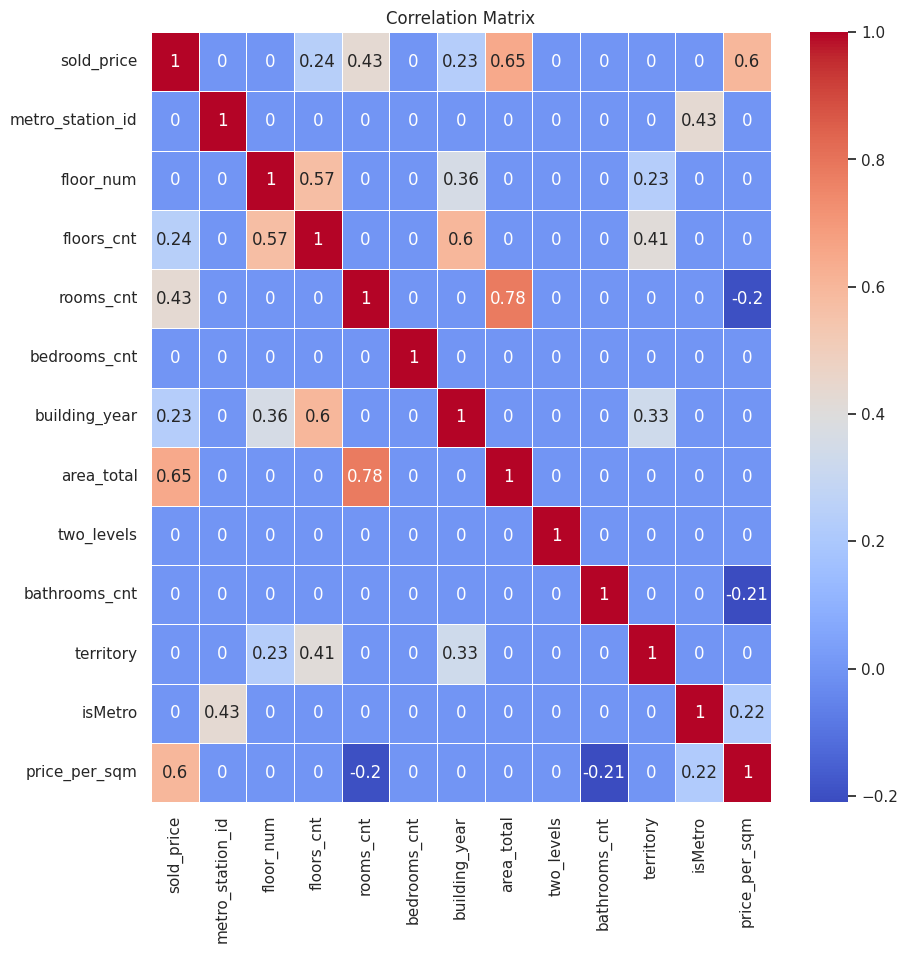

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)

correlation_matrix = data_sold_flats_matrix.corr()
correlation_matrix = np.round(correlation_matrix, 2)
correlation_matrix[np.abs(correlation_matrix) < 0.2] = 0

sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()


## 34) Сохраняем пред обработанный датасет в Excel

In [ ]:
data_sold_flats_matrix = data_sold_flats_matrix.drop(columns=['id'],axis = 1)
data_sold_flats_matrix.to_excel('/content/drive/MyDrive/E-soft/ТЗ/ver_final/data_sold_flats_result.xlsx', index=False)